# Capstone Project - Clustering and Analysis in Los Angeles County neighborhoods



### Applied Data Science Capstone by IBM/Coursera
### Gabriel Philot

## Table of Contents:

#### 1- Introduction
#### 2- Data
#### 3- Methodology
#### 4- Results and Discussion
#### 5- Conclusion
#### 6- Recommendation for the next step in the project


## 1-Introduction

### Interest of this Capstone Project

The idea of this project is to use one of the most popular unsupervised machine learning techniques, for creating an analysis of a city’s venues , based on the information from foursquare’s available data of each neighborhood. 
This project also serve to obtain some knowledge before opening primarily a restaurant in LA, and other applications that need information on how different and similar neighborhoods are by the symmetries of their characteristics of each neighborhood.

### 1.2-Business Problem

The objective of this capstone project is to determine the best location for opening a new restaurant of Bahian food in the city of Los Angeles. The methodology that will be used for this project brings some Data Science and machine learning methods for answering the following business question: Where is the best location for an entrepreneur to open his restaurant?

## 2-Data

### 2.1 Data to solve the problem

List of all neighborhoods in Los Angeles, CA, USA.

Latitude and Longitude from these neighborhoods.

All the venues of each neighborhoods.

### 2.2 Data Source

##### In this project the data came from two diferent souces:

https://usc.data.socrata.com/dataset/Los-Angeles-Neighborhood-Map/r8qd-yxsr - All the neighborhoods from Los Angeles and the latitude, longitude from each one neighborhood.

https://developer.foursquare.com/ - The availble venue data for each neighborhood.

### 2.3 Importing the libraries that wil be used on the project

In [1]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

!pip install geopy

from geopy.geocoders import Nominatim 
! pip install geocoder
import geocoder

import numpy as np

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json

import requests # library to handle requests

# Matplotlib and associated plotting modules

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


### 2.4 Picking the data

#### 2.4.1 LA: Los Angeles city Neighborhoods, with latitude and longitude coordinates

In [2]:
# read csv file
la = pd.read_csv(r'C:\Users\flavi\Documents\la_final.csv')

# sor
la.sort_values(by='Neighborhood', axis=0, inplace=True)

la = la.set_index('Neighborhood').reset_index()

la.shape , la.head()

((271, 3),
       Neighborhood   Latitude   Longitude
 0            Acton  34.497355 -118.169810
 1  Adams-Normandie  34.031462 -118.300208
 2     Agoura Hills  34.146737 -118.759885
 3       Agua Dulce  34.504927 -118.317104
 4         Alhambra  34.085539 -118.136512)

##### This Dataframe set is composed of 271 neighborhoods with the following properties: Name, Latitude, and Longitude

###### OBS: The Latitude and Longitude will be used in the foursquare to obtain the venues of each neighborhood

Geopy library will be used for getting the latitude and longitude of LA

In [3]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


Input my own credentials for Foursquare requests:

In [4]:
CLIENT_ID = 'OQS4HKNQKOD3TLOWGTI1F0ZXZUR2GXEVDEG5XWITFKEAUUMH' # your Foursquare ID
CLIENT_SECRET = 'ZVDQSUEFBWVVV2XN4VZIALPYAK2ANFO021YPXEQTL12MAQKH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Foursquare API linked to your ID')

Foursquare API linked to your ID


#### 2.5 Creating and aplying the getNearbyvenues function

This function wil give the venue name, latitude, longitude and category

In [5]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
LIMIT = 100

la_venues = getNearbyVenues(names=la['Neighborhood'],
                                       latitudes=la['Latitude'],
                                       longitudes=la['Longitude'],
                                )

Acton
Adams-Normandie
Agoura Hills
Agua Dulce
Alhambra
Alondra Park
Altadena
Angeles Crest
Arcadia
Arleta
Arlington Heights
Artesia
Athens
Atwater Village
Avalon
Avocado Heights
Azusa
Baldwin Hills/Crenshaw
Baldwin Park
Bel-Air
Bell
Bell Gardens
Bellflower
Beverly Crest
Beverly Grove
Beverly Hills
Beverlywood
Boyle Heights
Bradbury
Brentwood
Broadway-Manchester
Burbank
Calabasas
Canoga Park
Carson
Carthay
Castaic
Castaic Canyons
Central-Alameda
Century City
Cerritos
Charter Oak
Chatsworth
Chatsworth Reservoir
Chesterfield Square
Cheviot Hills
Chinatown
Citrus
Claremont
Commerce
Compton
Covina
Cudahy
Culver City
Cypress Park
Del Aire
Del Rey
Desert View Highlands
Diamond Bar
Downey
Downtown
Duarte
Eagle Rock
East Compton
East Hollywood
East La Mirada
East Los Angeles
East Pasadena
East San Gabriel
Echo Park
El Monte
El Segundo
El Sereno
Elizabeth Lake
Elysian Park
Elysian Valley
Encino
Exposition Park
Fairfax
Florence
Florence-Firestone
Gardena
Glassell Park
Glendale
Glendora
Gramercy P

## 3-Methodology

For this project, we will focus on understanding the symmetries between different neighborhoods, with the same pattern on venue types. The main objective that we want here is to solve the Business Problem with the data that we got. In order to pursue our goal, this part will be distributed in 3 Steps:

######  1) We're gonna make a quick data exploration, this first step wil bring us some overview from the data that we will work on.

###### 2) Preparation of the data.

###### 3) Clustering the neighborhoods based on the venue’s similarities between each one of them.

#### 3.1 Exploratory Data Analysis

In [16]:
la_venues.shape

(14401, 7)

In [17]:
la_ = la_venues['Venue Category'].value_counts()
la_

Mexican Restaurant                          688
Fast Food Restaurant                        575
Coffee Shop                                 561
Pizza Place                                 497
Sandwich Place                              383
Grocery Store                               337
Park                                        322
Convenience Store                           309
Burger Joint                                303
Chinese Restaurant                          272
American Restaurant                         244
Café                                        238
Pharmacy                                    228
Bakery                                      213
Sushi Restaurant                            196
Italian Restaurant                          182
Ice Cream Shop                              167
Korean Restaurant                           167
Hotel                                       166
Japanese Restaurant                         157
Bank                                    

In [18]:
la_top10 = la_.head(10)

la_top10

Mexican Restaurant      688
Fast Food Restaurant    575
Coffee Shop             561
Pizza Place             497
Sandwich Place          383
Grocery Store           337
Park                    322
Convenience Store       309
Burger Joint            303
Chinese Restaurant      272
Name: Venue Category, dtype: int64

In [19]:
la_porcent = (la_top10.sum())/(la_.sum())
print("Ten most comun vennues percentage over all the venues: "+"{:.2%}".format(la_porcent))

Ten most comun vennues percentage over all the venues: 29.49%


In [20]:
la_br = la_venues[la_venues['Venue Category']=='Brazilian Restaurant']
la_br =la_br['Venue Category'].value_counts()
la_br.sum()

20

In [21]:
la_latin = la_venues[la_venues['Venue Category']=='Latin American Restaurant']
la_latin = la_latin['Venue Category'].value_counts()
la_latin.sum()

50

In [22]:
la_porcent_br = (la_br.sum() + la_latin.sum())/(la_.sum())
print("Brazilian and Latin American Restaurants percentage over all the venues: "+"{:.2%}".format(la_porcent_br))

Brazilian and Latin American Restaurants percentage over all the venues: 0.49%


#### 3.2 Transforming the categorical values in to numeric

In [23]:
# one hot encoding
onehot = pd.get_dummies(la_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = la_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

#sort values alphabetically 
onehot = onehot.sort_values(by ='Neighborhood' )

#reset the index for the new dataframe
onehot = onehot.set_index('Neighborhood').reset_index()

onehot.head()

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Animal Shelter,Antique Shop,Apres Ski Bar,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bathing Area,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Bookstore,College Cafeteria,College Classroom,College Football Field,College Gym,College Quad,College Rec Center,College Residence Hall,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Dive Spot,Doctor's Office,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Medical Center,Medical School,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexi

In [24]:
onehot.shape

(14401, 453)

In [25]:
grouped = onehot.groupby('Neighborhood').sum().reset_index()
grouped.head(10)

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Animal Shelter,Antique Shop,Apres Ski Bar,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bathing Area,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Bookstore,College Cafeteria,College Classroom,College Football Field,College Gym,College Quad,College Rec Center,College Residence Hall,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Dive Spot,Doctor's Office,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Medical Center,Medical School,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexi

In [26]:
grouped.shape

(265, 453)

In [27]:
grouped_score = grouped.drop(['Neighborhood'], axis = 1)
grouped_score.shape

(265, 452)

With the preparation done we can see that for our K-Menas cluesting algoritm we wil use a data set that have **265 neighborhoods and 452 diferent types of venues**

#### 3.3 Using K-Means clustering

##### 3.3.1 Finding the optmial number of Clusters with silhouette score

In [28]:

import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [29]:
max_range = 20 # Maximum range of clusters

In [30]:


indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    lagc = grouped_score
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(lagc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(lagc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

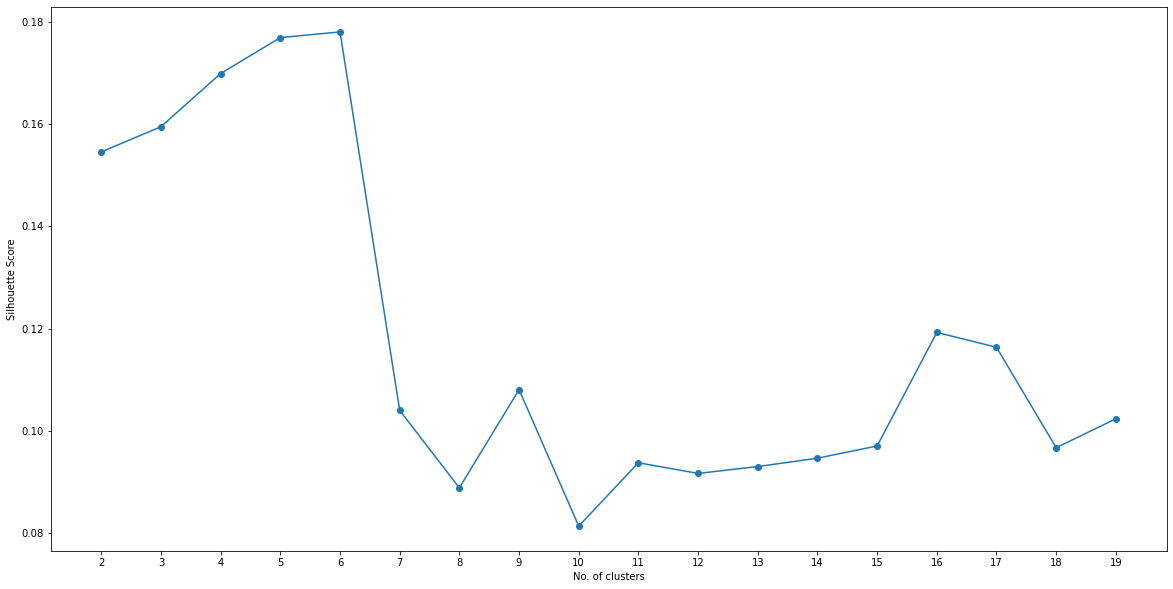

In [31]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [32]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

6

 From the graph the **optimal number** is found out to be considered for our clustering

#### 3.3.2 K-means cluester algoritm

In [33]:
#Run k-means to cluster the neighborhood into 6 clusters.

# set number of clusters
kclusters = opt

#only numerical data in for the training
grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=5).fit(grouped_clustering)

print('Training Complete!')

Training Complete!


In [34]:
#drop values
#grouped.drop(['Cluster Labels'], axis=1, inplace = True)

# add clustering labels
grouped.insert(0, 'Cluster Labels', kmeans.labels_)

merged = grouped

# merge nyc_neighborhoods to merged to add latitude/longitude for each neighborhood
merged = merged.join(la.set_index('Neighborhood'), on='Neighborhood')

merged.head(6)

,Cluster Labels,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Animal Shelter,Antique Shop,Apres Ski Bar,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bathing Area,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Bookstore,College Cafeteria,College Classroom,College Football Field,College Gym,College Quad,College Rec Center,College Residence Hall,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Dive Spot,Doctor's Office,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Medical Center,Medical School,Medical Supply Store,Mediterranean Restaurant,M

##### 3.3.3 Clustering Visualization using Folium Maps

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

This visualization gives us much understanding of the patterns of each Cluster, as we can see after a quick look, some clusters are more grouped and some others are well distributed along with all the city.

## 4-Results and Discussion 

In this part, we will discuss what we find, and make some manipulations for creating insights that will help us to answer the main question of this project.

#### 4.1 Quick results from the exploratory data analysis (item 3.1)

The ten most common venues percentage compared to all  the venues is 29.49%

Brazilian Restaurants percentage over all venues: 0.14%

Brazilian and Latin American Restaurants percentage over all the venues: 0.49%

#### 4.2 Exploring each cluster

In [36]:
merged['Cluster Labels'].value_counts(sort=False)

0     8
1    80
2     5
3    66
4    50
5    56
Name: Cluster Labels, dtype: int64

In [37]:
clustered_neighborhoods = grouped.loc[: , ['Cluster Labels', 'Neighborhood']]

clustered_neighborhoods.sort_values(by = ['Cluster Labels', 'Neighborhood'], ascending=True, inplace=True)

clustered_neighborhoods.reset_index(inplace=True, drop=True)

clustered_neighborhoods

,Cluster Labels,Neighborhood
0,0,Chinatown
1,0,East San Gabriel
2,0,Monterey Park
3,0,North El Monte
4,0,Northridge
5,0,Rosemead
6,0,San Gabriel
7,0,South San Gabriel
8,1,Acton
9,1,Agua Dulce


In [38]:
grouped2 = grouped

grouped_cluster = grouped2.groupby(by=['Cluster Labels']).sum()

grouped_cluster.reset_index(inplace=True)

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues

columns = ['Cluster Labels']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Cluster Labels'] = grouped_cluster['Cluster Labels']

for ind in np.arange(grouped_cluster.shape[0]):
    
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped_cluster.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.set_index('Cluster Labels', inplace=True)
    
neighborhoods_venues_sorted

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,
0,Chinese Restaurant,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Coffee Shop,Fast Food Restaurant,Asian Restaurant,Sandwich Place,Convenience Store,Bakery
1,Trail,Park,Mexican Restaurant,Pizza Place,Grocery Store,Coffee Shop,American Restaurant,Scenic Lookout,Café,Garden
2,Korean Restaurant,Coffee Shop,Mexican Restaurant,Japanese Restaurant,Café,Ice Cream Shop,Sandwich Place,Chinese Restaurant,Grocery Store,Bakery
3,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Sandwich Place,Park,Convenience Store,Coffee Shop,Grocery Store,Fried Chicken Joint,Burger Joint
4,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Convenience Store,Sandwich Place,Burger Joint,Coffee Shop,Grocery Store,Pharmacy,Chinese Restaurant
5,Coffee Shop,Mexican Restaurant,Italian Restaurant,American Restaurant,Café,Pizza Place,Sushi Restaurant,Grocery Store,Hotel,Sandwich Place


This dataframe give us a clear view on the simietries that each one have in terms of venues types. That means that simetrical neighborhoods in term of venues stay in the same cluster.

#### Visualizing in a bar graphic how much Brazilian/Latin American Restaurants are in each Cluster

In [41]:
grouped_cluster.shape

(6, 453)

In [42]:
grouped_cluster.head(6)

,Cluster Labels,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Animal Shelter,Antique Shop,Apres Ski Bar,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bathing Area,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Bookstore,College Cafeteria,College Classroom,College Football Field,College Gym,College Quad,College Rec Center,College Residence Hall,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Dive Spot,Doctor's Office,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Medical Center,Medical School,Medical Supply Store,Mediterranean Restaurant,Men's Store,Me

In [43]:
grouped_cluster_br = grouped_cluster.loc[:,['Brazilian Restaurant','Latin American Restaurant']]
grouped_cluster_br= grouped_cluster_br.astype(int) 


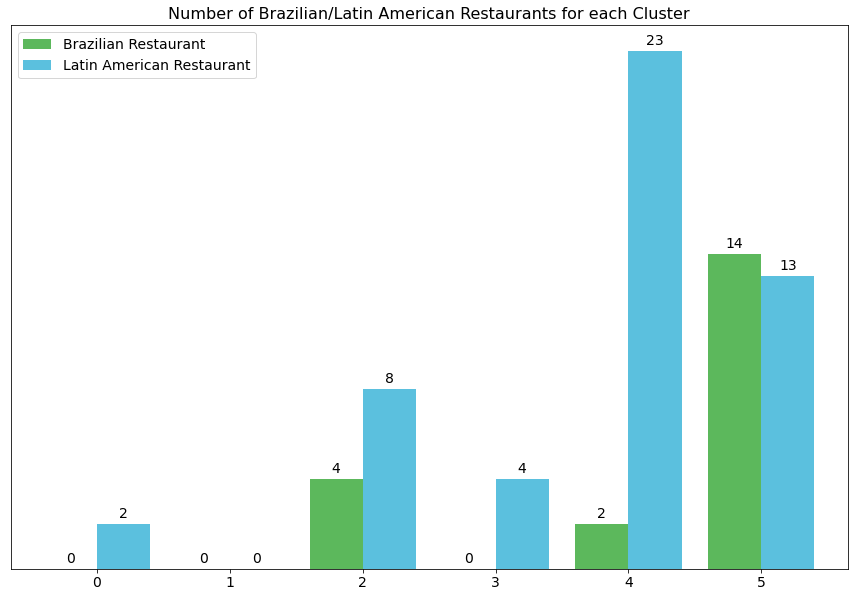

In [44]:
# Plotting
ax = grouped_cluster_br.plot(kind='bar', 
                figsize=(15, 10),
                rot=0,color = ['#5cb85c','#5bc0de','#d9534f'],
                width=.8,fontsize=14)

# Setting plot title
ax.set_title('Number of Brazilian/Latin American Restaurants for each Cluster',fontsize=16)

# Setting figure background color
ax.set_facecolor('white')

# setting legend font size
ax.legend(fontsize=14,facecolor = 'white') 

# Removing the Border 
ax.get_yaxis().set_visible(False)

# Creating a function to display the values.
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()

 bar chart (1) 

## 5-Conclusion

**Before cluestering** with a few line of codes we already got some useful information like:

1. This city loves spicy food, otherwise, Mexican restaurants wouldn’t be the most common venue in the city, and that’s perfect because Bahian food is very spicy too.

2. We don’t know what are all possible types of Latin American restaurants, but even taking the worst possible scenario, that all these restaurants are Brazilian, the competition amount would still be very small compared with other types of restaurants, so that’s a nice thing to find in terms of competition.

**After Clustering** we could get more very useful information:
    

3. There are 6 different clusters with 453 different types of venues.


4. The clustering could identify connections in LA neighborhoods that aren't evident if only their actual location and coordinates are taken into consideration.

5. The Ten most common Venue in each cluster we could determine things like:

a)   Cluster (0): This cluster has 8 neighborhoods, we can see that Asian Country restaurants are the most common venues in this cluster, maybe the reason is that there are a lot of people who came from Asia that live there.

b)  Cluster (1): This cluster has 80 neighborhoods, this cluster has most of the open air venues type, and looking on the folium map we could also see that most of then are  distant from the centers of the city

c) Cluster (2): With only 5 clusters, this cluster is very similar to cluster (0).

d) Cluster (3): This cluster has 66 neighborhoods and has a lot of restaurant venues with a good variability of the types.

e) Cluster (4): This cluster has 50 neighborhoods and has a lot of restaurant venues with a good variability of the types.

f) Cluster (5): This cluster has 56 neighborhoods and has a lot of restaurant venues with a good variability of the types.

With all that knowledge and the number of Brazilian/Latin American Restaurants for each cluster, we could make a decision:

1. Lets first start excluding the non-usable clusters for our question. Cluster (0) and Cluster (2) is very small compared with the rest of the clusters, and it seems that Asian food s the high preference with low variability of venues types.

2. Cluster (1) isn’t a good choice because most of the venues are open-air and in these cases are common a lower density of people and at the start of an unknown restaurant, it’s sound reasonable that a higher number of people that pass through the restaurant creates more chances for people go in and become a customer.

3. We now have to decide between only 3 Clusters that are very similar for restaurant venues, so with the mind-set of lower competition, we can choose after looking at the bar chart (1).

4. After looking at the bar chart (1) the answer to our Business problem is that the Bahian Restaurant should be open in one neighborhood of the cluster (3).

## 6- Recomendation for a next step in the project

For the best understanding of the clusters and the public that we want in our restaurant, we could search for economical rates in each neighborhood, this could give us to understand what public that we want to achieve in our merchandising and clustering.

Another thing is to find data over the flow of people that each neighborhood haves, so we could see what clusters have more movement of people.